In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# flow data
daily_data = pd.read_csv('./training_dataset/daily_dataset.csv')
hourly_data = pd.read_csv('./training_dataset/hourly_dataset.csv')
fivemin_data = pd.read_csv('./training_dataset/per5min_dataset.csv')
# other data
weather_data = pd.read_csv('./training_dataset/weather.csv')
epidemic_data = pd.read_csv('./training_dataset/epidemic.csv')
# 筛选训练数据
daily_train = daily_data[daily_data['train or test']=='train']
hourly_train = hourly_data[hourly_data['train or test']=='train']
fivemin_train = fivemin_data[fivemin_data['train or test']=='train']
weather_train = weather_data[weather_data['train or test']=='train']
epidemic_data = epidemic_data[epidemic_data['train or test']=='train']

In [3]:
hourly_train_new = hourly_train.copy()
hourly_train_new['day'] = hourly_train_new['time'].apply(lambda x:x[0:10])

In [4]:
cols = list(hourly_train_new.columns)[1:-2]
for each_col in cols:
    hourly_train_new[each_col] = hourly_train_new[each_col].apply(lambda x:abs(x))

In [7]:
# 去除抄表异常值
def anomaly_detect(x, threshold):
    if x>threshold:
        return None
    else:
        return x

flow_threshold = [150, 60, 200, 120, 15, 500, 50, 10, 25, 50, 20, 100, 10, 12, 10, 20, 30, 150, 50, 8]
for i in range(len(cols)):
    threshold_i = flow_threshold[i]
    hourly_train_new[cols[i]] = hourly_train_new[cols[i]].apply(lambda x:anomaly_detect(x, threshold_i))
hourly_train_new = hourly_train_new.fillna(method='ffill')

flow_1


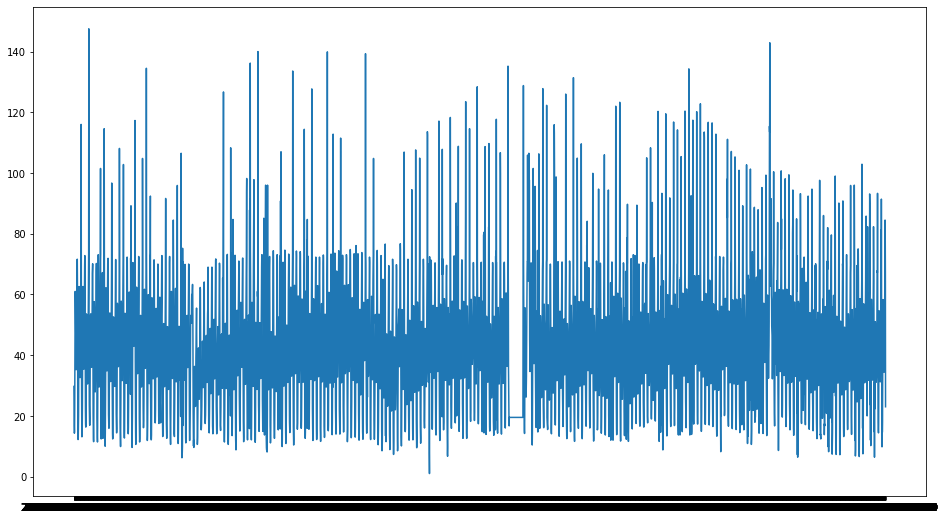

flow_2


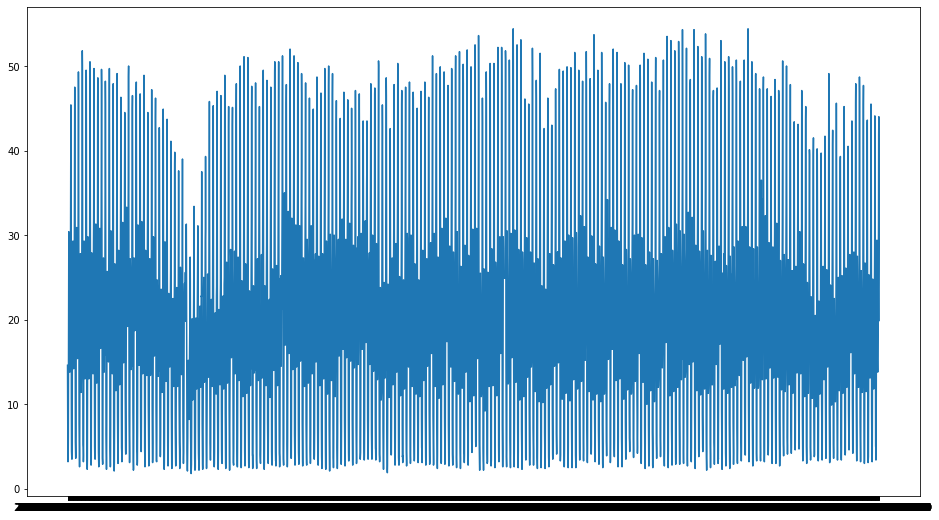

flow_3


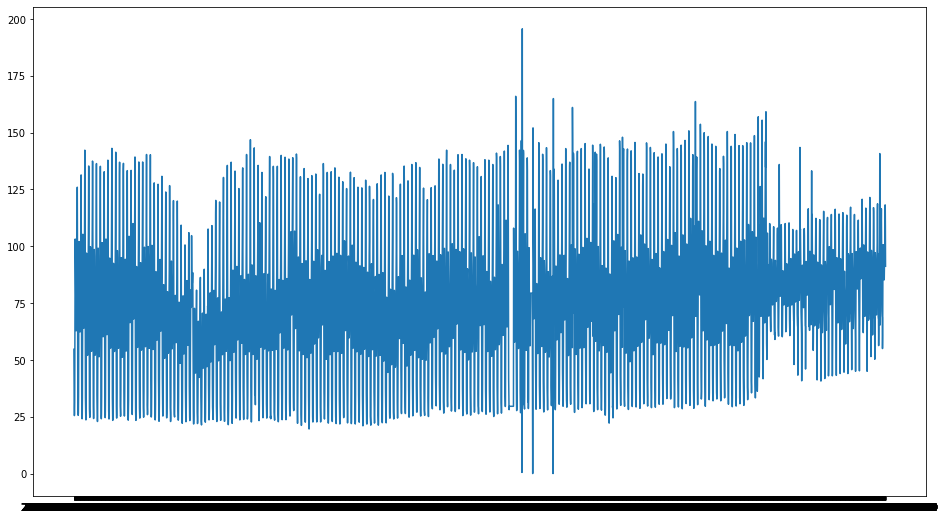

flow_4


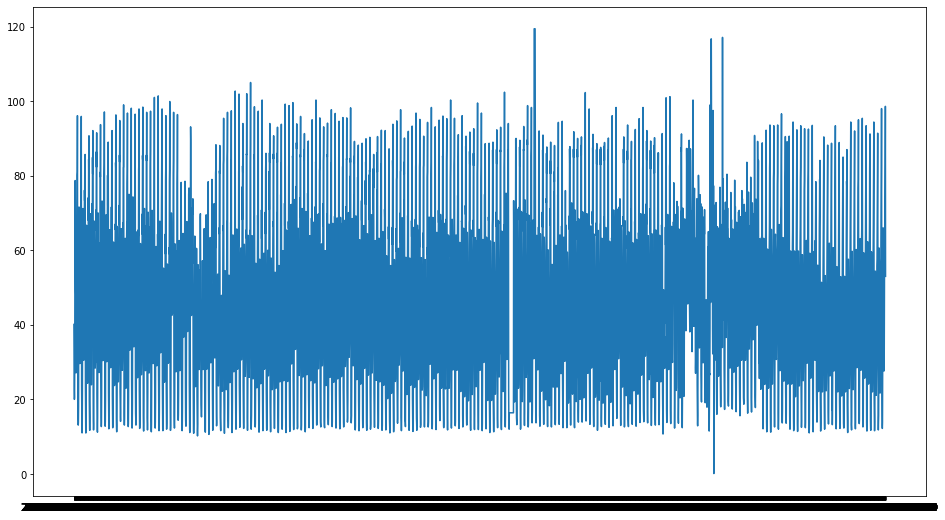

flow_5


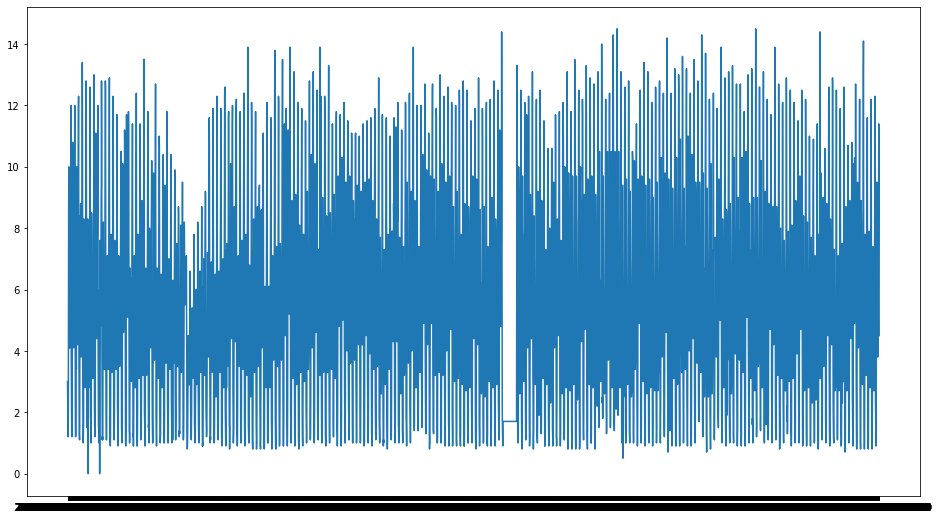

flow_6


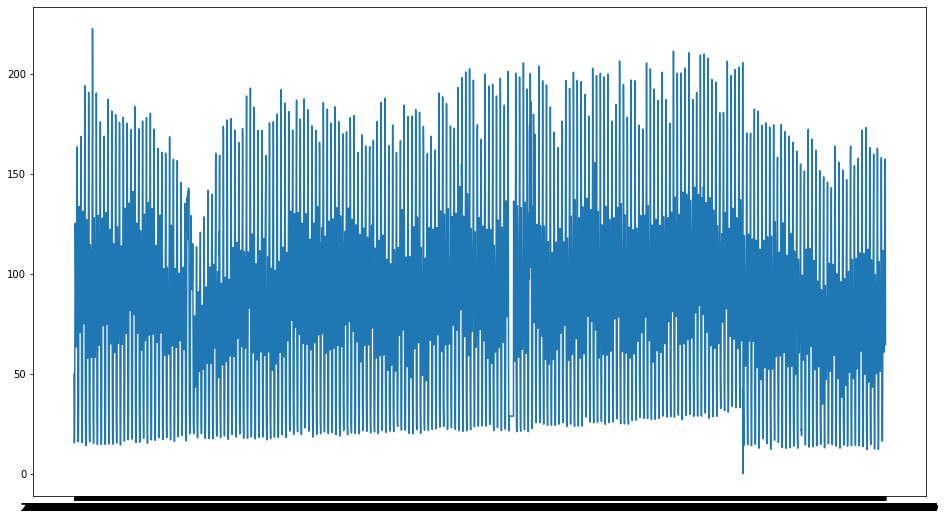

flow_7


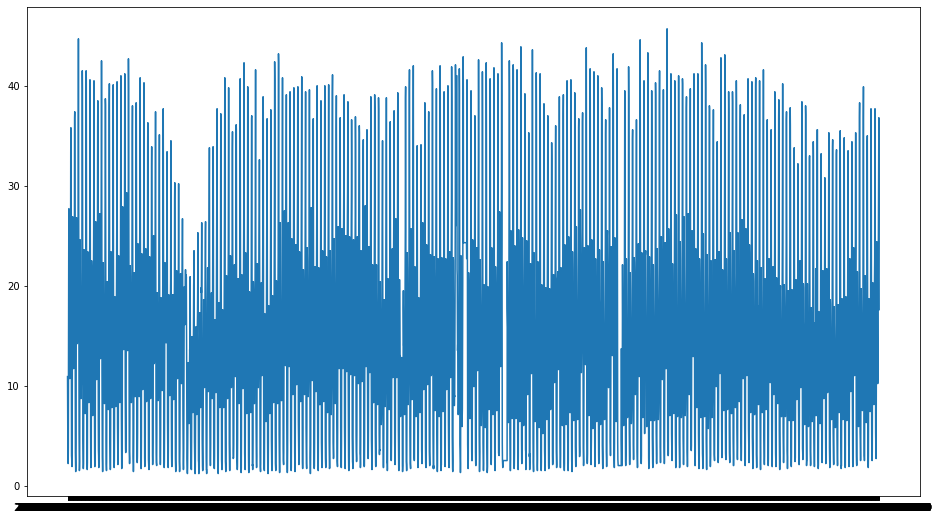

flow_8


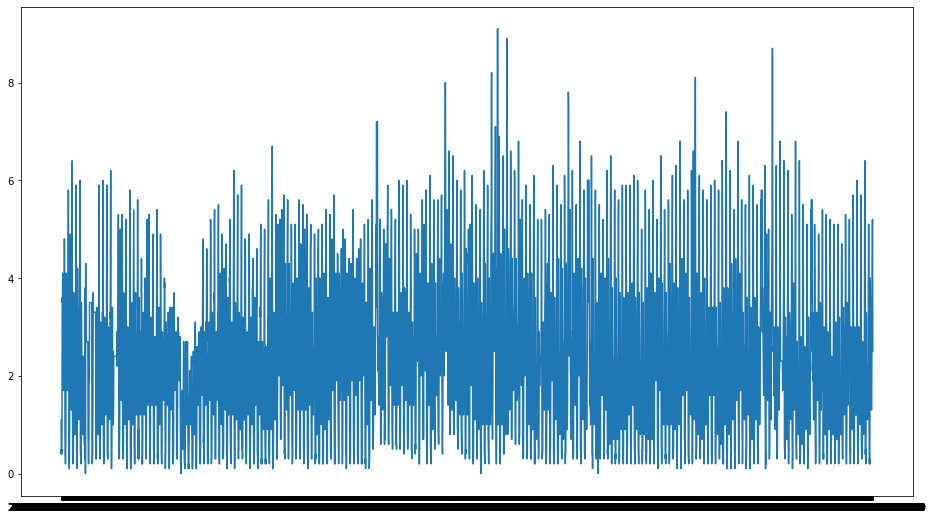

flow_9


In [ ]:
# plot
for each_col in cols:
    print(each_col)
    fig = plt.figure(figsize=(16,9))
    plt.plot(list(hourly_train_new['time']),list(hourly_train_new[each_col]))
    plt.show()